In [160]:
import pandas as pd
# csv_file_path = r"<file_path>"
# data = pd.read_csv(csv_file_path)

## Loading the Dataset

In [161]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploring the Dataset

In [162]:
data.shape

(1338, 7)

In [163]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [164]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [166]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [167]:
data.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Data Preprocessing

In [168]:
data.isnull().sum()
# data.dropna(inplace = True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [169]:
data.duplicated().sum()

1

In [170]:
data.drop_duplicates(inplace = True)

In [171]:
target = 'charges'
X = data.drop(target, axis = 1)
y = data[target]

In [172]:
X.shape, y.shape

((1337, 6), (1337,))

In [173]:
cat_col = X.select_dtypes(include = ['category','object']).columns
num_col = X.select_dtypes(include = {'number'}).columns

In [174]:
for col in cat_col:
    print(data[col].value_counts())
    print('\n')

sex
male      675
female    662
Name: count, dtype: int64


smoker
no     1063
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64




## Visualization

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

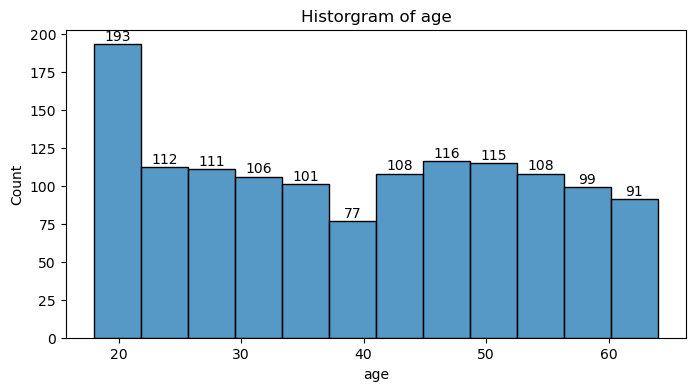

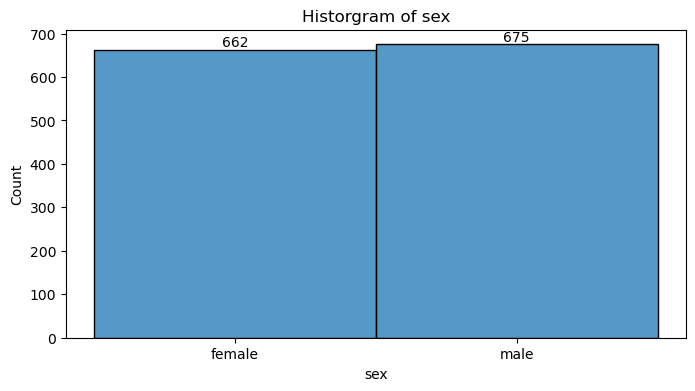

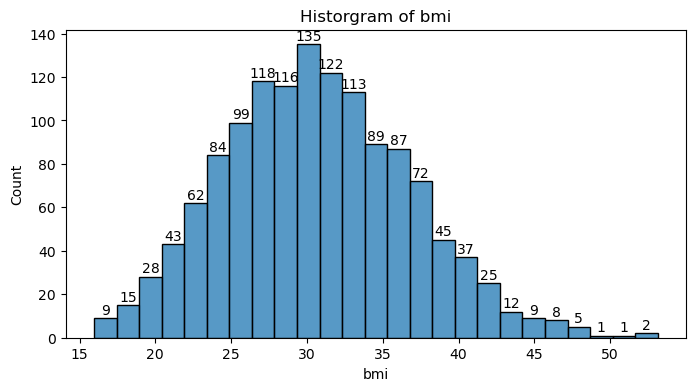

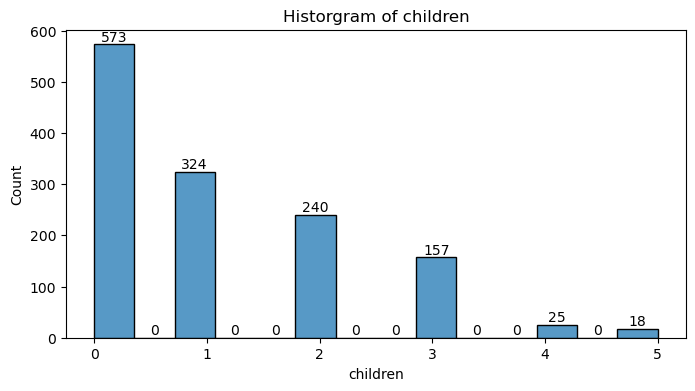

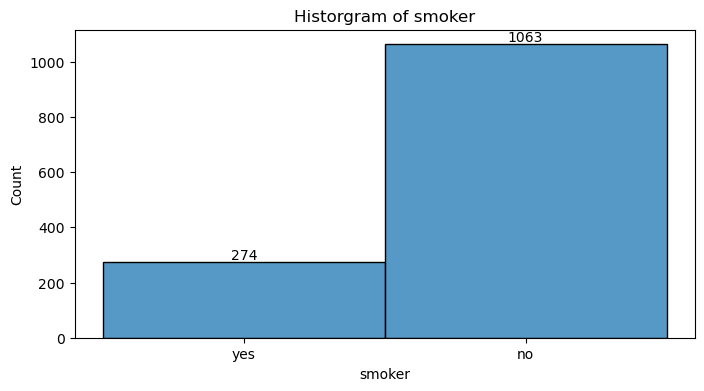

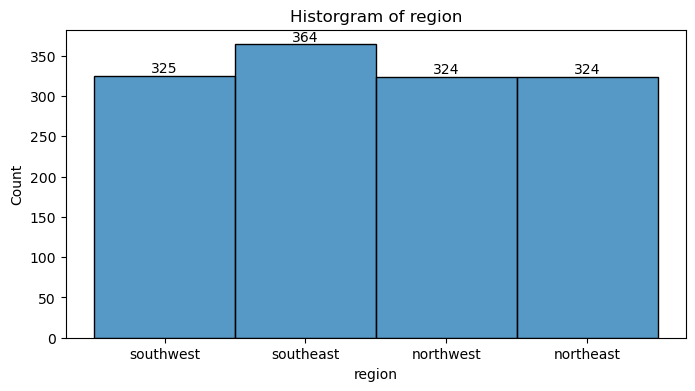

In [176]:
for col in X:
    plt.figure(figsize = (8,4))
    ax = sns.histplot(X[col])
    plt.title(f'Historgram of {col}')

     # Add labels to bars
    for p in ax.patches:
        height = p.get_height()  # Get bar height
        ax.text(
            x = p.get_x() + p.get_width() / 2,  # X-position: center of bar
            y = height + 0.5,                   # Y-position: slightly above bar
            s = f'{int(height)}',               # Label text (count as integer)
            ha = 'center',                      # Horizontal alignment
            va = 'bottom'                       # Vertical alignment
        )

<Axes: xlabel='charges', ylabel='Count'>

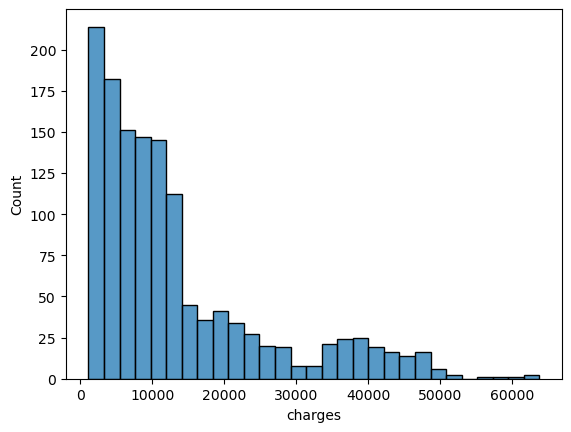

In [177]:
sns.histplot(y)

## Splitting the Data

In [178]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [179]:
print('shape of X_train is:   ', X_train.shape)
print('shape of y_train is:   ', y_train.shape)
print('shape of X_test is:   ', X_test.shape)
print('shape of y_test is:   ', y_test.shape) 

shape of X_train is:    (935, 6)
shape of y_train is:    (935,)
shape of X_test is:    (402, 6)
shape of y_test is:    (402,)


## One-Hot Encoding

In [180]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore')
X_train_cat = ohe.fit_transform(X_train[cat_col])
X_test_cat = ohe.transform( X_test[cat_col])

In [181]:
# converting to dataframe
X_train_cat_df = pd.DataFrame( X_train_cat,
                              columns = ohe.get_feature_names_out(cat_col),
                              index = X_train.index  )
X_test_cat_df = pd.DataFrame( X_test_cat,
                             columns = ohe.get_feature_names_out(cat_col),
                             index = X_test.index )

## Standardizing Numerical Columns

In [182]:
#standardize numerical column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [183]:
#combine numerical and categorical data back together
X_train = pd.concat([X_train[num_col], X_train_cat_df], axis =1)
X_test = pd.concat([X_test[num_col], X_test_cat_df], axis = 1)

## Model Training and Evaluation

In [194]:
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)
print("Linear Regression Result:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Linear Regression Result:
Mean Squared Error: 38940169.922826335
R-squared: 0.6348017633368876


In [196]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Decision Tree Result:")
print(f"Mean Squared Error:{mean_squared_error(y_pred, y_test)}")
print(f"R- squared: {r2_score(y_pred, y_test)}")

Decision Tree Result:
Mean Squared Error:39100955.36329965
R- squared: 0.7604275252066917


In [197]:
# K-Nearest Neighbors (KNN) Regression
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()                           
knn_reg.fit(X_train, y_train)                           
y_pred = knn_reg.predict(X_test)                       

print("KNN Regression Result:")
print(f"Mean Squared Error:{mean_squared_error(y_pred, y_test)}")
print(f"R- squared: {r2_score(y_pred, y_test)}")


KNN Regression Result:
Mean Squared Error:60435054.746994756
R- squared: 0.2404854809822251


In [201]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()                           
rf_reg.fit(X_train, y_train)                          
                     
print("Random Foreset Regressor Result:")
print(f"Mean Squared Error:{mean_squared_error(y_pred, y_test)}")
print(f"R- squared: {r2_score(y_pred, y_test)}")

Random Foreset Regressor Result:
Mean Squared Error:29549441.678982653
R- squared: 0.7773696810514095


In [202]:
# Support Vector Machine (SVM) Regression
from sklearn.svm import SVR
svr_reg = SVR()                           
svr_reg.fit(X_train, y_train)                          
y_pred = svr_reg.predict(X_test)                       

print("SVR model Result:")
print(f"Mean Squared Error:{mean_squared_error(y_pred, y_test)}")
print(f"R- squared: {r2_score(y_pred, y_test)}")

SVR model Result:
Mean Squared Error:191653096.9329283
R- squared: -103703.90172079483


In [200]:
# AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
adaboost_reg = AdaBoostRegressor()                           
adaboost_reg.fit(X_train, y_train)                         
y_pred = adaboost_reg.predict(X_test)                      

print("Ada Boost Regressor model Result:")
print(f"Mean Squared Error:{mean_squared_error(y_pred, y_test)}")
print(f"R- squared: {r2_score(y_pred, y_test)}")

Ada Boost Regressor model Result:
Mean Squared Error:29549441.678982653
R- squared: 0.7773696810514095


In [199]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_reg = GradientBoostingRegressor()                          
gradient_reg.fit(X_train, y_train)                         
y_pred = gradient_reg.predict(X_test)                       

print("GradientBoosting Regressor model Result:")
print(f"Mean Squared Error:{mean_squared_error(y_pred, y_test)}")
print(f"R- squared: {r2_score(y_pred, y_test)}")

GradientBoosting Regressor model Result:
Mean Squared Error:22425503.406046428
R- squared: 0.8444047176139748


In [198]:
# XGBoost Regression
import xgboost as xgb
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()                          
xgb_reg.fit(X_train, y_train)                           
y_pred = xgb_reg.predict(X_test)                       

print("XGBRegressor Model Result:")
print(f"Mean Squared Error:{mean_squared_error(y_pred, y_test)}")
print(f"R- squared: {r2_score(y_pred, y_test)}")

XGBRegressor Model Result:
Mean Squared Error:27733952.156962637
R- squared: 0.8172342947968618


 # Key Findings:

*  Gradient Boosting Regressor emerged as the best-performing model, achieving an RMSE of 4,736 and R² of 0.84, indicating strong predictive accuracy and the ability to explain 84% of the variance in charges.
*  Tree-based models (Gradient Boosting, XGBoost, Random Forest) outperformed linear models due to their ability to capture non-linear relationships and interactions between features.
*  Smoking status was the most critical predictor, with smokers incurring charges 3–4x higher than non-smokers.